# Sprint5: Train-Test con ScikitLearn 

## Tarea M5 T02

### Ejercicio 1:Parte el conjunto de datos adjunto en train y test. Estudia ambos conjuntos por separado, a nivel descriptivo.

Iformación sobre el Dataset:

1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per $10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in $1000's

1.1 Carga del conjunto de datos


In [1]:
import pandas as pd

ruta_del_archivo = "C:/Users/acbon/Desktop/Data Science/housing data.csv"

nombres_columnas = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df = pd.read_csv(ruta_del_archivo, encoding='ISO-8859-1', names=nombres_columnas, header=None)

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


1.2 Análisis básico de los datos 

In [2]:
num_atributos = len(df.columns)
nombres_atributos = df.columns

print(f'Número de atributos: {num_atributos}')
print('Nombres de atributos:')
for nombre in nombres_atributos:
    print(nombre)

Número de atributos: 14
Nombres de atributos:
CRIM
ZN
INDUS
CHAS
NOX
RM
AGE
DIS
RAD
TAX
PTRATIO
B
LSTAT
MEDV


In [3]:
df.info()
#convertir a categoricos?  Igual de momento no es necesario convertir a categoricos
#dejaré tal cual para luego usar una técnica para codificar varibles categóricas como one hot si es necesario en "CHAS" y "RAD"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
df.CHAS.value_counts()


0    471
1     35
Name: CHAS, dtype: int64

In [5]:
df.RAD.value_counts()

24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: RAD, dtype: int64

In [6]:
print("Descripción de los datos")
df.describe().T


Descripción de los datos


,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [7]:
print("No existe ningún null")

df.isnull().sum()

No existe ningún null


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
print("Los valores únicos son los siguentes:")
df.nunique()

Los valores únicos son los siguentes:


CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

1.3 Train y Test del conjunto de datos.


En el conjunto de datos de Boston Housing, el objetivo típico es predecir el valor mediano de las viviendas ocupadas por el propietario (columna "MEDV"). Esto se considera una tarea de regresión, ya que se está tratando de predecir un valor numérico continuo, que representa el precio mediano de las viviendas en miles de dólares.

Por lo tanto, la columna objetivo más apropiada para hacer un conjunto de entrenamiento y prueba en este conjunto de datos sería "MEDV". También es necesario  utilizar las características (atributos) como "CRIM," "ZN," "INDUS," "CHAS," y otros para predecir el precio de las viviendas en función de esas características. Esta es una tarea común en la predicción de precios de bienes raíces o en problemas relacionados con la valoración de propiedades.

En definitiva, en el conjunto de datos de Boston Housing, "MEDV" es la columna objetivo más relevante para predecir el precio mediano de las viviendas, por lo que sería la elección adecuada para crear un conjunto de entrenamiento y prueba en un problema de regresión. En esta división, el 30% de los datos se reservará para el conjunto de prueba, y se establece una semilla aleatoria (random_state=42) para garantizar la reproducibilidad de la división.

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X = df.drop('MEDV', axis=1)  # Características
y = df['MEDV']  # Columna objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Dimensiones del conjunto de entrenamiento:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")

print("\nDimensiones del conjunto de prueba:")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")


Dimensiones del conjunto de entrenamiento:
X_train: (354, 13), y_train: (354,)

Dimensiones del conjunto de prueba:
X_test: (152, 13), y_test: (152,)


De acuerdo al resultado obtenido podemos observar que el conjunto de entrenamiento contiene 354 muestras, cada una con 13 características.
El conjunto de prueba contiene 152 muestras, también con 13 características. Tanto el conjunto de entrenamiento como el de prueba tienen una sola columna para la variable objetivo, pero esto se representa como una dimensión unidimensional.

1.4 Ánalisis descriptivo del conjunto de datos de entrenamiento y prueba

1.4.1: Conjunto de Entrenamiento.

In [11]:
print("Información del conjunto de entrenamiento:")
print(X_train.info())

Información del conjunto de entrenamiento:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 5 to 102
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     354 non-null    float64
 1   ZN       354 non-null    float64
 2   INDUS    354 non-null    float64
 3   CHAS     354 non-null    int64  
 4   NOX      354 non-null    float64
 5   RM       354 non-null    float64
 6   AGE      354 non-null    float64
 7   DIS      354 non-null    float64
 8   RAD      354 non-null    int64  
 9   TAX      354 non-null    float64
 10  PTRATIO  354 non-null    float64
 11  B        354 non-null    float64
 12  LSTAT    354 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 38.7 KB
None


In [12]:
print("Estadisticas descriptivas del conjunto de entrenamiento:")
print(X_train.describe().T)


Estadisticas descriptivas del conjunto de entrenamiento:
         count        mean         std        min        25%        50%  \
CRIM     354.0    3.469887    8.315831    0.00906    0.08232    0.25651   
ZN       354.0   11.403955   22.608457    0.00000    0.00000    0.00000   
INDUS    354.0   11.133051    6.938651    1.21000    5.13000    9.69000   
CHAS     354.0    0.073446    0.261237    0.00000    0.00000    0.00000   
NOX      354.0    0.557259    0.116792    0.38500    0.45000    0.53800   
RM       354.0    6.325672    0.719211    3.86300    5.88950    6.22750   
AGE      354.0   68.799718   27.665360    2.90000   46.02500   77.35000   
DIS      354.0    3.765874    2.126032    1.12960    2.07370    3.10730   
RAD      354.0    9.437853    8.639971    1.00000    4.00000    5.00000   
TAX      354.0  407.042373  166.522237  187.00000  279.00000  330.00000   
PTRATIO  354.0   18.277966    2.256792   12.60000   16.65000   18.60000   
B        354.0  359.701808   86.924779    0

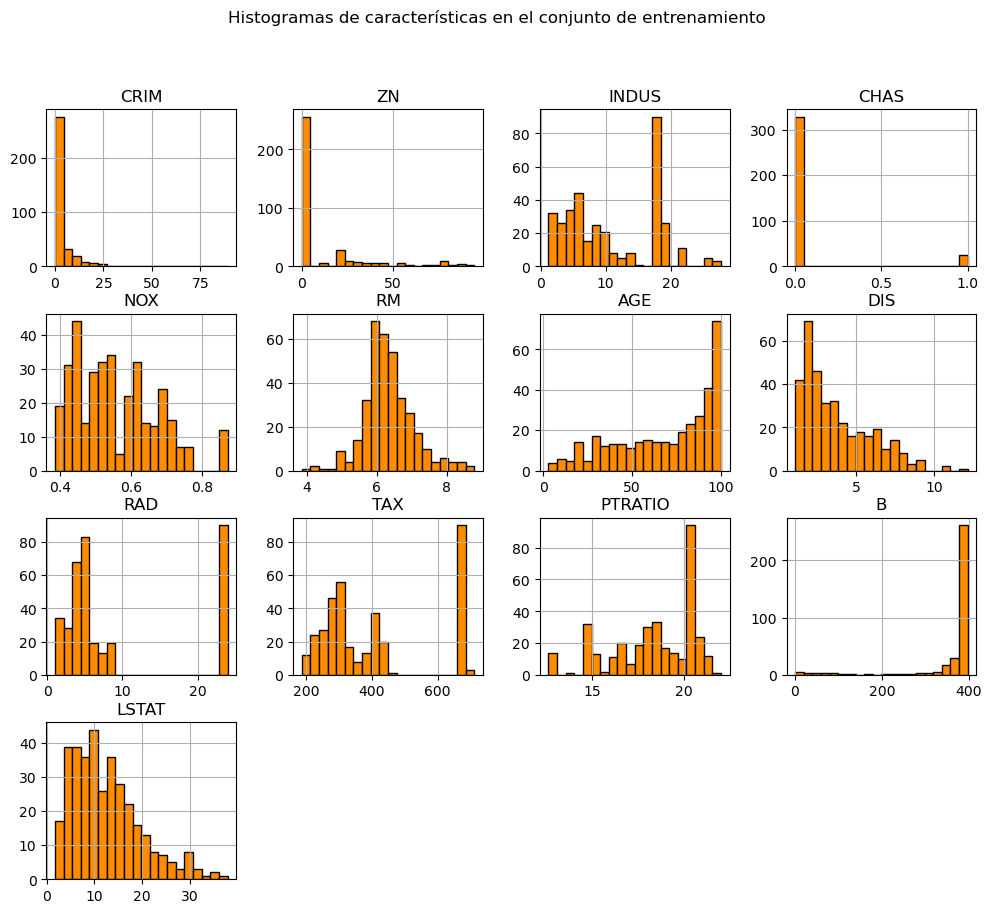

In [13]:
# Histogramas de las características en el conjunto de entrenamiento
import matplotlib.pyplot as plt

X_train.hist(bins=20, figsize=(12, 10), color='darkorange', edgecolor='black')
plt.suptitle("Histogramas de características en el conjunto de entrenamiento")
plt.show()




Analizando los histogramas, se identifican varios patrones, posibles anomalías y tendencias:

Patrones:

1. Distribuciones sesgadas a la derecha:
- CRIM: La tasa de criminalidad per cápita por ciudad tiende a ser baja para la mayoría de las ciudades, con un pequeño número de ciudades que presentan tasas más altas.
- ZN: Una gran proporción de ciudades tiene una pequeña o ninguna zona residencial para lotes grandes, lo que indica que los lotes grandes son relativamente raros.
- DIS: La mayoría de las ciudades están más cerca de los centros de empleo de Boston, con menos ciudades situadas a distancias más lejanas.
- LSTAT: Una gran parte de la población tiene un estatus socioeconómico más alto, con menos personas en el estrato de estatus más bajo.

2. Distribuciones aproximadamente normales o simétricas:
- RM: El número promedio de habitaciones por vivienda tiende a ser normalmente distribuido, sugiriendo una variabilidad razonable sin sesgo extremo hacia casas más grandes o más pequeñas.

3. Distribuciones bimodales o multimodales:
- INDUS: La proporción de acres de negocios no minoristas por ciudad muestra dos modas distintas, lo que indica que algunas ciudades pueden estar más industrializadas que otras.
- RAD: El índice de accesibilidad a carreteras radiales sugiere la existencia de ciertas agrupaciones en términos de accesibilidad al transporte.

Posibles anomalías:

1. Valores extremos o atípicos:
- B: La proporción de afroamericanos por ciudad tiene un pico cerca de un extremo y podría tener valores extremos que se desvíen significativamente del valor de 0.63, que parece ser la norma o el valor esperado. Aqui es importante señalar que, a pesar de que la fórmula que abarca los datos de la columna B parece ser una referencia al Índice de Disimilaridad, una medida demográfica utilizada para evaluar la segregación. El uso de datos demográficos como la raza en modelos predictivos de precios de vivienda puede ser considerada discriminatoria y racista, ya que perpetúa las disparidades sistémicas y puede violar principios de igualdad y no discriminación. Es crucial asegurarse de que cualquier modelo utilizado para analizar los valores de la vivienda no perpetúe la discriminación ni refuerce las desigualdades existentes.

2. Variables con valores censurados o limitados:
- CHAS: Como variable dummy, muestra que la mayoría de las propiedades no limitan con el río Charles, lo cual no es una anomalía sino una característica binaria del dataset.

Tendencias:

1. Edades de propiedades:
- AGE: Hay una proporción significativa de viviendas ocupadas por el propietario construidas antes de 1940, lo que indica una tendencia hacia propiedades más antiguas.
Concentraciones y políticas:
- NOX: La concentración de óxidos nítricos tiene una distribución que sugiere diferencias moderadas entre las ciudades, pero sin un sesgo claro.
- TAX: La tasa de impuesto a la propiedad presenta una distribución multimodal, lo que sugiere diferentes políticas fiscales o valoraciones de propiedades entre diferentes ciudades.
- PTRATIO: La relación alumno-profesor por ciudad tiene un pico, lo que indica que muchas ciudades pueden tener una norma o promedio similar en términos de tamaño de clase.

Estas observaciones reflejan la variabilidad y estructura subyacente en los datos de vivienda relacionados con las zonas urbanas y suburbanas de Boston. Las tendencias y patrones detectados son críticos para cualquier análisis posterior, como la segmentación de mercado, la planificación urbana o el modelado predictivo en bienes raíces. Las posibles anomalías y las distribuciones inusuales deben considerarse cuidadosamente, ya que pueden influir en la interpretación de los modelos o en las decisiones basadas en los datos.










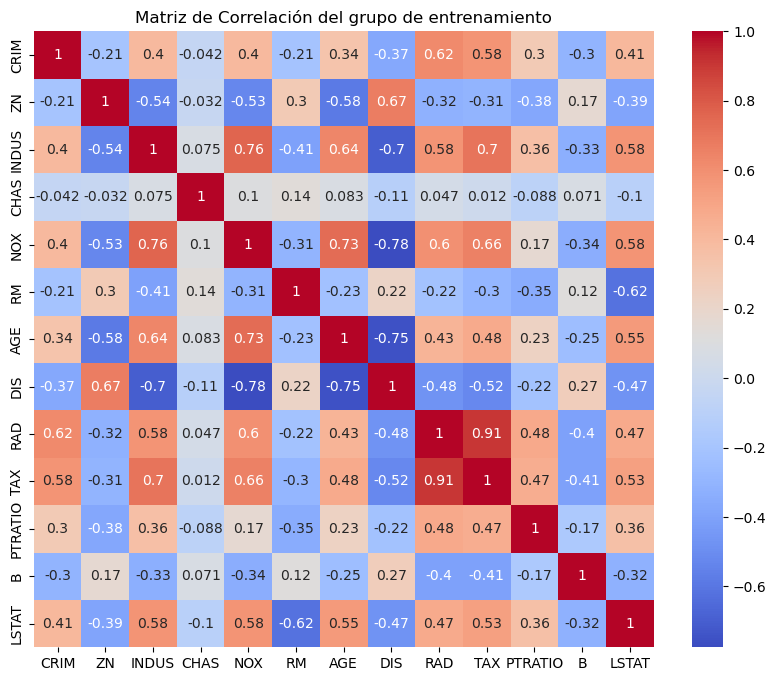

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula la matriz de correlación
correlation_matrix = X_train.corr()

# Crea un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación del grupo de entrenamiento")
plt.show()

La matriz de correlación proporcionada muestra las relaciones lineales entre diferentes variables en un conjunto de datos. Los valores de correlación varían entre -1 y 1, donde:

* 1 indica una correlación positiva perfecta (si una variable aumenta, la otra también lo hace en la misma proporción),
* -1 indica una correlación negativa perfecta (si una variable aumenta, la otra disminuye en la misma proporción),
* 0 indica que no hay correlación lineal entre las variables.
A continuación, se realiza un análisis de las correlaciones más destacadas:

Alta correlación positiva (cercana a 1):

* INDUS y NOX: Con una correlación de 0.76, sugiere que a mayor proporción de acres industriales, mayor es la concentración de óxidos nítricos, lo cual tiene sentido ya que las áreas industriales tienden a tener mayores emisiones.
* NOX y AGE: Con una correlación de 0.73, indica que las zonas con viviendas más antiguas también tienden a tener una mayor concentración de óxidos nítricos, lo que podría reflejar la antigüedad de las infraestructuras y su impacto en la calidad del aire.
* AGE y DIS: Con una correlación de -0.75, muestra que las unidades ocupadas por el propietario construidas antes de 1940 tienden a estar más lejos de los centros de empleo de Boston.
* RAD y TAX: Con una correlación de 0.91, esta relación muy fuerte sugiere que las áreas con mejor acceso a las carreteras radiales también tienen tasas de impuestos a la propiedad más altas.

Alta correlación negativa (cercana a -1):

* DIS y NOX: Con una correlación de -0.78, indica que las áreas más distantes de los centros de empleo tienen concentraciones más bajas de óxidos nítricos, lo que puede reflejar menor densidad de tráfico o industria.
* DIS y INDUS: Con una correlación de -0.71, sugiere que las áreas industriales están más cercanas a los centros de empleo.

Moderada correlación positiva (entre 0.5 y 0.7):

* CRIM y RAD, CRIM y TAX: Con correlaciones de 0.62 y 0.58 respectivamente, indican que hay una tendencia de mayor criminalidad en áreas con mejor accesibilidad a carreteras y con tasas de impuestos más altas.
* INDUS y TAX: Con una correlación de 0.7, sugiere que las áreas con más zonificación industrial también tienen mayores tasas de impuestos.

Moderada correlación negativa (entre -0.5 y -0.7):

* ZN y AGE: Con una correlación de -0.58, sugiere que hay menos tierras residenciales zonificadas para lotes grandes en áreas con más viviendas antiguas.
* RM y LSTAT: Con una correlación de -0.62, sugiere que las viviendas con más habitaciones tienden a estar en áreas con un porcentaje más bajo de población de estatus socioeconómico más bajo.

Las correlaciones bajas (cercanas a 0) indican una relación lineal débil o inexistente entre las variables, lo que significa que los cambios en una no predicen de manera confiable los cambios en la otra.

Este análisis de correlaciones es importante para entender las relaciones entre las variables y puede ser crucial para la selección de características en la modelización estadística o de aprendizaje automático. Las variables altamente correlacionadas pueden llevar a problemas de multicolinealidad en modelos lineales, mientras que las correlaciones moderadas pueden señalar interesantes relaciones predictivas o causales para explorar más a fondo. Las variables con baja correlación pueden no ser útiles juntas para predecir un resultado, pero pueden ser importantes individualmente o en combinación con otras características no examinadas aquí.








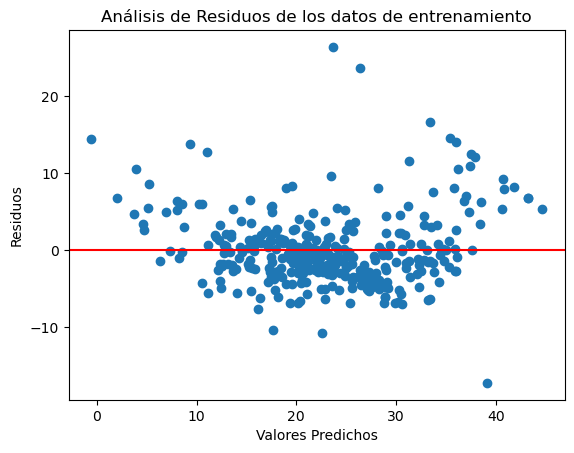

MSE de los residuos: 22.55


In [15]:
# Ánalisis de residuos del grupo de Entrenamiento
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Inicializa y ajusta un modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realiza predicciones en los datos de entrenamiento
y_pred = model.predict(X_train)

# Calcula los residuos
residuos = y_train - y_pred

# Grafica los residuos
plt.scatter(y_pred, residuos)
plt.xlabel("Valores Predichos")
plt.ylabel("Residuos")
plt.title("Análisis de Residuos de los datos de entrenamiento")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

# Calcula la media del error cuadrado (MSE) de los residuos
mse = mean_squared_error(y_train, y_pred)
print(f"MSE de los residuos: {mse:.2f}")





Segun el ánalisis de residuos, podemos observar lo siguiente:

- Patrones no Aleatorios: Si los residuos mostraran algún patrón claro, como una forma curva o en forma de embudo, esto indicaría no linealidades no capturadas por el modelo o heteroscedasticidad. En este gráfico, aunque no hay un patrón curvilíneo claro, la dispersión de los residuos parece aumentar a medida que aumentan los valores predichos, lo que podría sugerir heteroscedasticidad.

- Estructuras no Lineales: La falta de un patrón sistemático en la dispersión de los residuos a lo largo del rango de valores predichos podría indicar que el modelo ha capturado la relación lineal entre las variables. Sin embargo, la presencia de residuos que parecen alejarse más de la línea de cero residuos a medida que aumentan los valores predichos podría ser una señal de que una relación no lineal no ha sido completamente modelada.

- Distribución de Residuos: Los residuos deberían distribuirse aleatoriamente alrededor de la línea roja horizontal que representa el residuo cero, con aproximadamente la misma cantidad de residuos por encima y por debajo de esta línea a lo largo de todo el rango de valores predichos. En este gráfico, parece haber una concentración de residuos alrededor de la línea de cero, pero con algunos residuos dispersos que sugieren posibles valores atípicos o una varianza de error que aumenta con los valores predichos.

- Varianza Constante (Homoscedasticidad): Para un buen ajuste de modelo, los residuos deberían mostrar homoscedasticidad, lo que significa que la varianza de los residuos es constante a lo largo de los valores predichos. En este gráfico, la aparente expansión de la dispersión a medida que aumentan los valores predichos sugiere que el modelo podría beneficiarse de una revisión para considerar la heteroscedasticidad.

En pocas palabras, el gráfico sugiere que hay indicios de heteroscedasticidad y potencialmente algunas no linealidades no capturadas por el modelo. 

In [16]:
# Estadísticas descriptivas para la columna objetivo en el conjunto de entrenamiento
target_stats = y_train.describe()
print(target_stats.describe())


count      8.000000
mean      63.394301
std      118.195696
min        5.000000
25%       15.397146
50%       22.382910
75%       32.450000
max      354.000000
Name: MEDV, dtype: float64


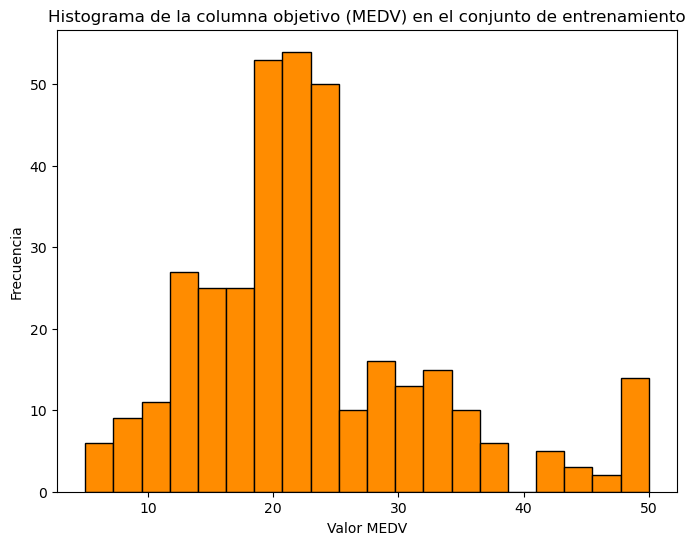

In [17]:
# Histograma de la columna objetivo en el conjunto de entrenamiento
plt.figure(figsize=(8, 6))
plt.hist(y_train, bins=20, color='darkorange', edgecolor='black')
plt.title("Histograma de la columna objetivo (MEDV) en el conjunto de entrenamiento")
plt.xlabel("Valor MEDV")
plt.ylabel("Frecuencia")
plt.show()


El histograma de la columna objetivo "MEDV" en el conjunto de entrenamiento parece mostrar la distribución de valores medianos de viviendas en una región o conjunto de datos específico.

Podemos observar que el histograma está sesgado hacia la derecha, lo que significa que hay una mayor frecuencia de valores medianos de vivienda en el extremo inferior del rango de precios y menos en el extremo superior.
La mayoría de los valores de "MEDV" están concentrados entre 10 y 30, lo que sugiere que la mayoría de las viviendas en este conjunto de datos tienen un valor mediano en este rango.
Hay una presencia notable de valores más altos, pero con una frecuencia mucho menor. Esto puede indicar la existencia de algunas viviendas que son significativamente más caras que la mayoría de las otras en el conjunto de datos.
El rango de valores alrededor de 20 a 25 parece ser el más común, lo que se podría considerar como la moda de esta distribución.
Existe una caída notable en la frecuencia después del valor 50, lo que podría sugerir un punto de corte o un valor máximo en los datos, donde los valores que exceden este punto podrían haber sido truncados o limitados.

En el contexto de un modelo predictivo, esta distribución podría implicar que un modelo puede tener un rendimiento relativamente bueno al predecir valores de viviendas en el rango medio, pero puede enfrentar desafíos con valores más extremos debido a su menor frecuencia. Además, la presencia de sesgo y valores atípicos podría afectar la precisión de un modelo de regresión lineal, por lo que se podrían considerar transformaciones de los datos o modelos robustos a los valores atípicos.


1.4.2 Conjunto de Prueba

In [18]:
print("Información del conjunto de prueba:")
print(X_test.info())

Información del conjunto de prueba:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 173 to 447
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     152 non-null    float64
 1   ZN       152 non-null    float64
 2   INDUS    152 non-null    float64
 3   CHAS     152 non-null    int64  
 4   NOX      152 non-null    float64
 5   RM       152 non-null    float64
 6   AGE      152 non-null    float64
 7   DIS      152 non-null    float64
 8   RAD      152 non-null    int64  
 9   TAX      152 non-null    float64
 10  PTRATIO  152 non-null    float64
 11  B        152 non-null    float64
 12  LSTAT    152 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 16.6 KB
None


In [19]:
# Estadísticas descriptivas del conjunto de prueba
print("\nEstadísticas descriptivas del conjunto de prueba:")
print(X_test.describe())


Estadísticas descriptivas del conjunto de prueba:
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  152.000000  152.000000  152.000000  152.000000  152.000000  152.000000   
mean     3.948046   11.269737   11.145461    0.059211    0.548723    6.189059   
std      9.252844   24.983828    6.697032    0.236799    0.113877    0.654707   
min      0.006320    0.000000    0.460000    0.000000    0.392000    3.561000   
25%      0.079710    0.000000    5.692500    0.000000    0.448750    5.872750   
50%      0.243035    0.000000    9.690000    0.000000    0.532000    6.159500   
75%      4.367163    0.000000   18.100000    0.000000    0.614000    6.463500   
max     73.534100  100.000000   27.740000    1.000000    0.871000    8.725000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  152.000000  152.000000  152.000000  152.000000  152.000000  152.000000   
mean    68.051316    3.862975    9.809211  411.019737   1

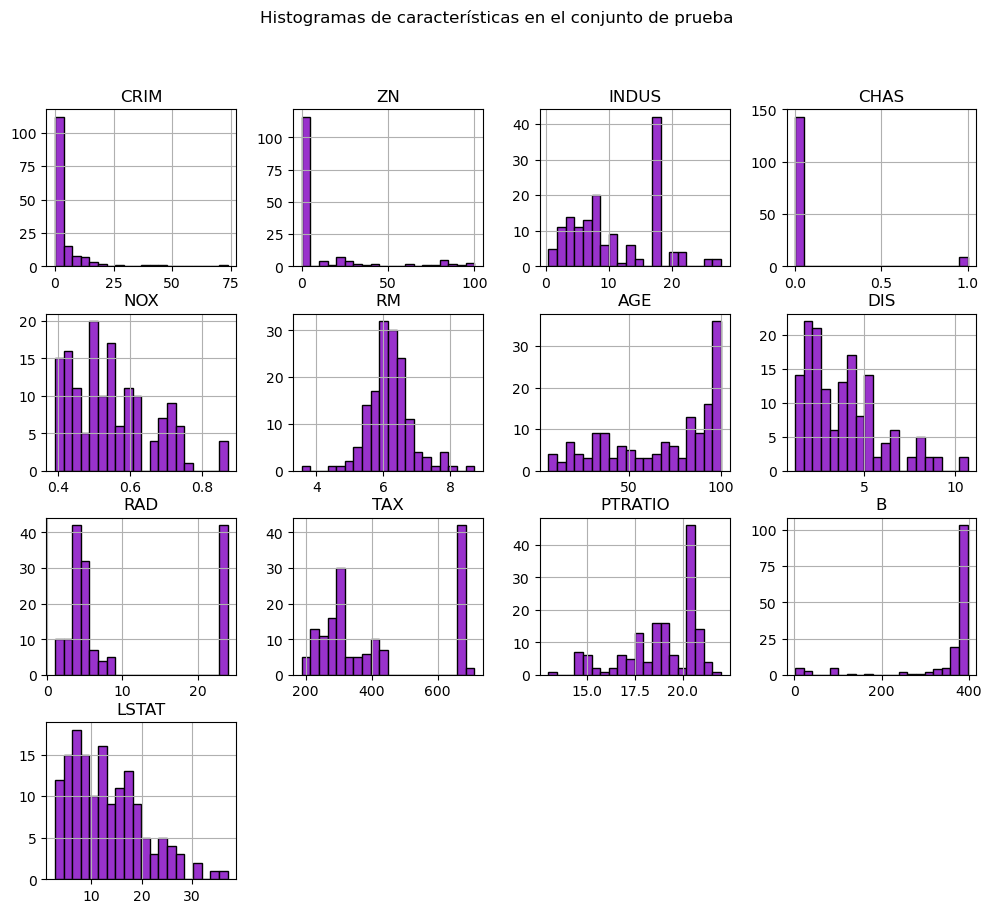

In [20]:
# Histogramas de las características en el conjunto de prueba
X_test.hist(bins=20, figsize=(12, 10),  color='darkorchid', edgecolor='black')
plt.suptitle("Histogramas de características en el conjunto de prueba")
plt.show()


En el gráfico "Histogramas de características en el conjunto de prueba" se pueden observar patrones, anomalías y tendencias similares a las que se encontaron en el conjunto de entrenamiento. 

- Patrones: La mayoría de las características parecen tener distribuciones sesgadas o asimétricas.Algunas características como ZN, CHAS, y RAD muestran un patrón de agrupación en valores bajos con un largo "tail" hacia valores más altos, lo que indica que pocos distritos tienen valores altos para estas variables. RM y LSTAT parecen tener distribuciones más simétricas en comparación con las otras características.

- Anomalías: Algunos histogramas muestran barras individuales separadas del grupo principal de barras (por ejemplo, CHAS), lo cual puede indicar la presencia de valores atípicos o una distribución con múltiples modas. La característica CRIM parece tener una concentración muy alta de valores cerca de cero y luego una dispersión de barras hacia valores más altos, lo que podría sugerir una alta presencia de valores extremadamente bajos de criminalidad y unos pocos valores muy altos.

- Tendencias: INDUS y NOX, que podrían estar relacionadas con zonas industriales y niveles de contaminación, respectivamente, muestran un sesgo hacia valores más bajos. La característica AGE muestra una tendencia hacia valores más altos, lo que podría indicar que hay muchas viviendas antiguas en el conjunto de datos de prueba. La característica TAX muestra una posible bimodalidad, con dos picos en la distribución, lo que podría sugerir dos grupos distintos en términos de tasas de impuestos a la propiedad.

Estas observaciones proporcionan información valiosa para comprender las características del conjunto de datos de prueba y para evaluar si las distribuciones de las características son consistentes con las del conjunto de entrenamiento, lo cual es importante para garantizar que el modelo generalice bien a nuevos datos. Si las distribuciones en el conjunto de prueba difieren significativamente de las del conjunto de entrenamiento, esto podría afectar el rendimiento del modelo y podría requerir un ajuste en el proceso de modelado o en la preparación de los datos.

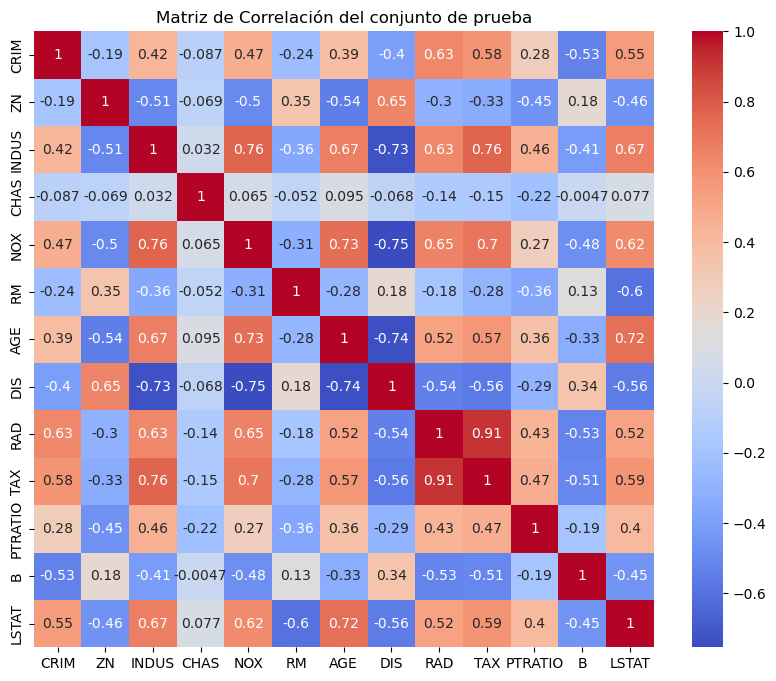

In [21]:
#Matriz de Correlación del conjunto de prueba

# Calcula la matriz de correlación
correlation_matrix = X_test.corr()

# Crea un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación del conjunto de prueba")
plt.show()

La matriz de correlación del conjunto de prueba muestra las relaciones entre diferentes características, similares a lo que se observan en el conjunto de entrenamiento. Las correlaciones positivas indican una relación directa entre las variables, mientras que las negativas indican una relación inversa. Valores cercanos a 1 o -1 representan una fuerte correlación, y valores cercanos a 0 indican poca o ninguna correlación.

Correlaciones Positivas Fuertes:
- INDUS y NOX: La correlación de 0.76 sugiere una fuerte relación directa; posiblemente, las áreas más industrializadas tienen niveles más altos de contaminación por óxidos de nitrógeno.
- AGE y NOX: Una correlación de 0.73 puede indicar que las viviendas más antiguas se encuentran en áreas con mayor contaminación.
- RAD y TAX: La correlación de 0.91 es muy fuerte, lo que sugiere que hay una relación directa entre la accesibilidad a las carreteras radiales y la tasa de impuestos a la propiedad.

Correlaciones Negativas Fuertes:
- DIS y NOX: Una correlación de -0.75 implica que lugares más distantes de los centros de empleo tienen niveles más bajos de NOX, lo cual es coherente con menos contaminación lejos de zonas industriales o centros urbanos.
- DIS y INDUS: Con una correlación de -0.74, sugiere que las áreas industriales tienden a estar más cerca de los centros de empleo.

Correlaciones Moderadas:
- CRIM y RAD, así como CRIM y TAX, tienen correlaciones moderadas positivas, lo que podría indicar que áreas con mayor criminalidad tienen una mayor accesibilidad a autopistas y posiblemente tasas de impuestos más altas.

Correlaciones Débiles o Inexistentes:
CHAS tiene correlaciones bajas con casi todas las demás variables, lo que sugiere que cualquier característica que represente (como la proximidad a un río) no tiene una relación lineal fuerte con las demás variables del conjunto de datos.


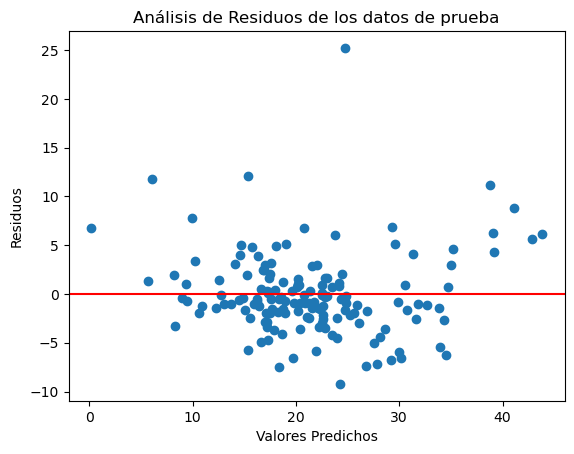

MSE de los residuos: 18.09


In [22]:
# Ánalisis de residuos del grupo de Prueba

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Inicializa y ajusta un modelo de regresión lineal
model = LinearRegression()
model.fit(X_test, y_test)

# Realiza predicciones en los datos de entrenamiento
y_pred = model.predict(X_test)

# Calcula los residuos
residuos = y_test - y_pred

# Grafica los residuos
plt.scatter(y_pred, residuos)
plt.xlabel("Valores Predichos")
plt.ylabel("Residuos")
plt.title("Análisis de Residuos de los datos de prueba")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

# Calcula la media del error cuadrado (MSE) de los residuos
mse = mean_squared_error(y_test, y_pred)
print(f"MSE de los residuos: {mse:.2f}")


En este gráfico podemos observar que los residuos se grafican contra los valores predichos. Este tipo de gráfico es utilizado para evaluar la adecuación del modelo utilizado para los datos. 

- Distribución de Residuos: Los residuos parecen estar distribuidos aleatoriamente alrededor de la línea horizontal que representa residuos de cero, lo cual es un buen indicio. No hay patrones claros que sugieran una no linealidad evidente.

- Homoscedasticidad: La varianza de los residuos parece ser constante en relación con los valores predichos, lo que sugiere homoscedasticidad. No hay signos claros de heteroscedasticidad, como un embudo o patrones en forma de abanico que indicarían una varianza de error que cambia con el nivel de la variable predictora.

- Valores Atípicos: Hay algunos puntos residuales que se desvían significativamente de la línea cero, lo cual podría indicar la presencia de valores atípicos en los datos. Estos puntos podrían tener un efecto sustancial en el modelo y podrían merecer una investigación adicional.

- Ausencia de Estructuras Complicadas: No parece haber curvaturas o patrones sistemáticos en la dispersión de los puntos, lo que podría sugerir que el modelo ha capturado adecuadamente la relación entre las variables predictoras y la variable de respuesta.

En general, basándose en este gráfico de residuos, el modelo parece ser adecuado para los datos con la posible excepción de algunos valores atípicos. 

In [23]:
# Estadísticas descriptivas para la columna objetivo en el conjunto de prueba
test_target_stats = y_test.describe()
print(test_target_stats.describe())


count      8.000000
mean      37.189816
std       48.323562
min        5.000000
25%       14.408908
50%       20.703947
75%       30.593750
max      152.000000
Name: MEDV, dtype: float64


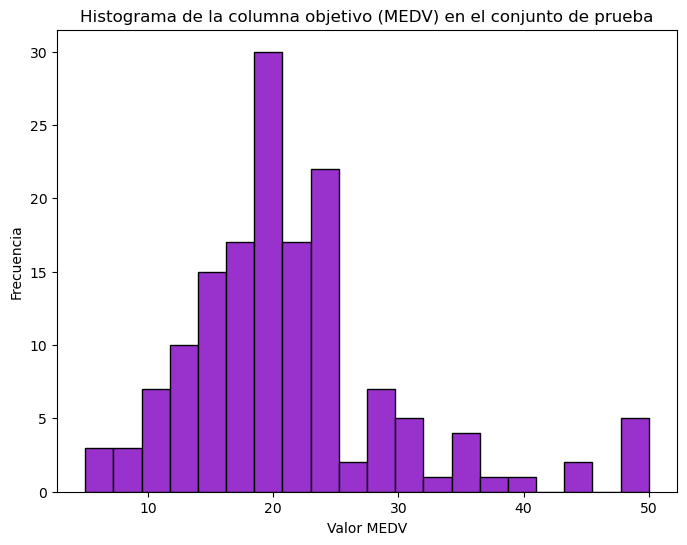

In [24]:
# Histograma de la columna objetivo en el conjunto de prueba
plt.figure(figsize=(8, 6))
plt.hist(y_test, bins=20, color='darkorchid', edgecolor='black')
plt.title("Histograma de la columna objetivo (MEDV) en el conjunto de prueba")
plt.xlabel("Valor MEDV")
plt.ylabel("Frecuencia")
plt.show()


El histograma de la columna objetivo (MEDV) en el conjunto de prueba muestra la frecuencia de los valores medianos de vivienda (MEDV). En este gráfico podemos observar lo siguiente: 

- Distribución de Precios: La mayoría de los valores de MEDV se concentran en el rango bajo a medio, con un pico particularmente alto alrededor de 20. Esto indica que una gran proporción de las viviendas en el conjunto de prueba tienen un valor mediano cercano a este punto.

- Sesgo a la Derecha: La distribución parece estar sesgada hacia la derecha, lo que significa que hay menos viviendas con valores medianos altos. Esto es típico en los mercados inmobiliarios donde hay muchas más viviendas de precio medio y bajo que de alto precio.

- Valores Atípicos: Aunque hay menos frecuencia en valores altos, todavía hay viviendas que alcanzan valores de 50, lo que puede indicar la presencia de propiedades de lujo o valores atípicos en los datos.

- Comparación con el Conjunto de Entrenamiento: Si comparamos este histograma con el del conjunto de entrenamiento, podríamos evaluar si la distribución de MEDV es consistente entre ambos. Una consistencia en la distribución de la variable objetivo entre el entrenamiento y la prueba es crucial para un modelo predictivo fiable.

La información del histograma es valiosa para entender la distribución de la variable que estamos tratando de predecir y puede ser útil para informar el proceso de modelado, como la selección de un modelo apropiado o la necesidad de transformar los datos para mejorar el ajuste del modelo.

### Ejercicio 2: Aplica algún proceso de transformación (estandarizar los datos numéricos, crear columnas dummies, polinomios...).



Después de analizar los datos y las características generales y probar con varios proceso de tranformación me voy a quedar con los sigientes: 

1. Estandarización (StandardScaler):
 Para las variables numéricas ('CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT'), se utiliza la estandarización, que reescala las características para que tengan una media de 0 y una desviación estándar de 1. Esta transformación es importante porque muchos algoritmos de aprendizaje automático, como los basados en gradientes y los que usan medidas de distancia, asumen que todas las características se distribuyen normalmente y tienen una varianza similar. La estandarización ayuda a estos algoritmos a converger más rápido y a evitar que características con rangos más amplios dominen el proceso de entrenamiento.

2. One-Hot Encoding (OneHotEncoder):

La variable categórica 'RAD', que es de tipo entero, se somete a One-Hot Encoding para convertir las categorías en una representación numérica que los modelos de aprendizaje automático puedan entender. Aunque 'RAD' está representada por enteros, estos números representan categorías y no tienen un orden o relación cuantitativa. One-Hot Encoding convierte esta variable en múltiples columnas binarias, evitando que el modelo malinterprete los datos como ordinales o continuos, lo cual podría resultar en un rendimiento deficiente del modelo.

3. Sin transformación:

 La variable binaria 'CHAS', que indica si la propiedad linda con el río Charles, ya son dummies, por lo que se pasa sin cambios. No se necesita ninguna transformación adicional para las variables binarias (0 o 1) porque ya están en un formato que los modelos pueden utilizar directamente.


En definitiva, el ColumnTransformer se emplea para aplicar diversas transformaciones a las distintas columnas del conjunto de datos. Esto se logra mediante la creación de un Pipeline que incorpora el ColumnTransformer, lo que simplifica la aplicación coherente de estas transformaciones y su replicación en nuevos datos, como el conjunto de prueba. Este enfoque garantiza que el modelo reciba datos en el formato esperado tanto durante el entrenamiento como durante la validación o las pruebas. La elección de estas transformaciones se basa en las mejores prácticas y en la necesidad de adaptar los datos al tipo de modelo a utilizar, con el fin de optimizar el rendimiento y evitar la introducción de sesgos o malinterpretaciones durante el preprocesamiento.



In [25]:
from sklearn.preprocessing import StandardScaler
import pandas as pd


# Definir las columnas numéricas para escalar
numeric_features = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']

# Inicializa el StandardScaler
scaler = StandardScaler()

scaler.fit(X_train[numeric_features])  # Solo ajustar con X_train
X_train_scaled = scaler.transform(X_train[numeric_features])
X_test_scaled = scaler.transform(X_test[numeric_features])

# Convertir los arrays transformados de nuevo a DataFrames
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numeric_features, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=numeric_features, index=X_test.index)



In [26]:
from sklearn.preprocessing import OneHotEncoder

# Define la columna categórica para aplicar One-Hot Encoding
categorical_features = ['RAD']

# Inicializa el OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # Actualización para evitar el FutureWarning
encoder.fit(X_train[categorical_features])  # Solo ajustar con X_train
X_train_encoded = encoder.transform(X_train[categorical_features])
X_test_encoded = encoder.transform(X_test[categorical_features])

# Convertir los arrays transformados de nuevo a DataFrames
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_features), index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_features), index=X_test.index)


In [27]:
# Combina las columnas transformadas con la columna 'CHAS' original
X_train_prepared = pd.concat([X_train_scaled_df, X_train_encoded_df, X_train['CHAS']], axis=1)
X_test_prepared = pd.concat([X_test_scaled_df, X_test_encoded_df, X_test['CHAS']], axis=1)

print("Grupo de entrenamiento")
print(X_train_prepared.head(5))
print("\nGrupo de prueba")
print(X_test_prepared.head(5))


Grupo de entrenamiento
         CRIM        ZN     INDUS       NOX        RM       AGE       DIS  \
5   -0.414259 -0.505125 -1.292142 -0.851085  0.145264 -0.365584  1.081628   
116 -0.402008 -0.505125 -0.162083 -0.087967 -0.208401  0.133941 -0.487876   
45  -0.397211 -0.505125 -0.609489 -0.936828 -0.896237 -1.266900  0.628596   
16  -0.290936 -0.505125 -0.431970 -0.165136 -0.543965 -1.429789  0.345133   
468  1.457816 -0.505125  1.005500  0.194987 -0.556496  0.079645 -0.403892   

          TAX   PTRATIO         B  ...  RAD_1  RAD_2  RAD_3  RAD_4  RAD_5  \
5   -1.112790  0.187271  0.396514  ...    0.0    0.0    1.0    0.0    0.0   
116  0.150088 -0.212090  0.387067  ...    0.0    0.0    0.0    0.0    0.0   
45  -1.046639 -0.167716  0.428541  ...    0.0    0.0    1.0    0.0    0.0   
16  -0.601625  1.207859  0.312760  ...    0.0    0.0    0.0    1.0    0.0   
468  1.557294  0.852872  0.104124  ...    0.0    0.0    0.0    0.0    0.0   

     RAD_6  RAD_7  RAD_8  RAD_24  CHAS  
5      0.0

### Ejercicio 3: Resume las nuevas columnas generadas de forma estadística y gráfica

In [30]:
# Resumen estadístico de las nuevas columnas
stat_summary = X_train_prepared.describe()

print("Resumen estadístico")
print(X_train_prepared.head().T)

Resumen estadístico
              5         116       45        16        468
CRIM    -0.414259 -0.402008 -0.397211 -0.290936  1.457816
ZN      -0.505125 -0.505125 -0.505125 -0.505125 -0.505125
INDUS   -1.292142 -0.162083 -0.609489 -0.431970  1.005500
NOX     -0.851085 -0.087967 -0.936828 -0.165136  0.194987
RM       0.145264 -0.208401 -0.896237 -0.543965 -0.556496
AGE     -0.365584  0.133941 -1.266900 -1.429789  0.079645
DIS      1.081628 -0.487876  0.628596  0.345133 -0.403892
TAX     -1.112790  0.150088 -1.046639 -0.601625  1.557294
PTRATIO  0.187271 -0.212090 -0.167716  1.207859  0.852872
B        0.396514  0.387067  0.428541  0.312760  0.104124
LSTAT   -1.015316 -0.053663 -0.311324 -0.822422  0.803800
RAD_1    0.000000  0.000000  0.000000  0.000000  0.000000
RAD_2    0.000000  0.000000  0.000000  0.000000  0.000000
RAD_3    1.000000  0.000000  1.000000  0.000000  0.000000
RAD_4    0.000000  0.000000  0.000000  1.000000  0.000000
RAD_5    0.000000  0.000000  0.000000  0.000000  0.0

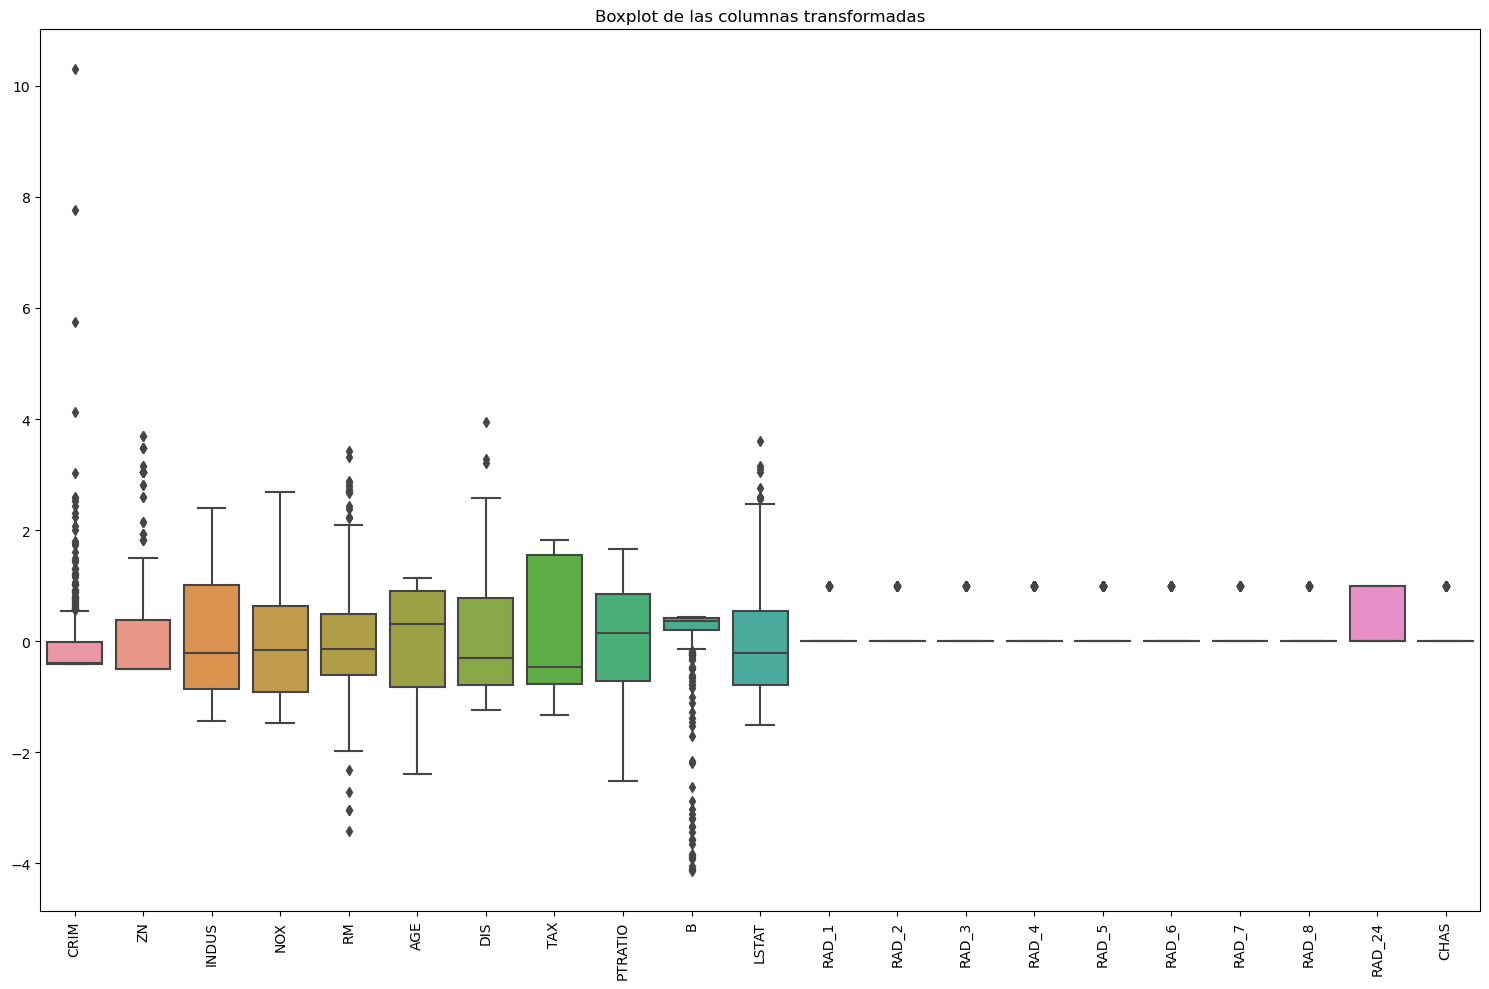

In [32]:
# Crear el boxplot de las columnas transformadas
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.boxplot(data=X_train_prepared)
plt.title('Boxplot de las columnas transformadas')
plt.xticks(rotation=90)  # Rotar las etiquetas si hay muchas y se solapan
plt.tight_layout()  # Ajustar automáticamente los parámetros de la subtrama
plt.show()

En este gráfico podemos observar lo siguiente:

- La línea central de cada caja representa la mediana de los datos, que es el valor del punto medio donde la mitad de las observaciones se sitúa por encima y la otra mitad por debajo.

- Los bordes de la caja (los cuartiles superior e inferior) indican el tercer cuartil (el 75% de los datos es menor o igual a este valor) y el primer cuartil (el 25% de los datos es menor o igual a este valor), respectivamente. La altura de la caja, por lo tanto, representa el rango intercuartílico (RIC), que es la dispersión de la mitad central de los datos.

- Los "bigotes" (o "whiskers") se extienden desde los bordes de la caja hasta el valor máximo y mínimo dentro de un límite que generalmente es 1.5 veces el RIC desde el cuartil superior e inferior. Los puntos que caen fuera de estos límites se consideran valores atípicos.

- Los puntos que están fuera de los bigotes representan los valores atípicos o anómalos que se encuentran fuera del rango típico de los datos.

De manera más específica, podemos observar que las columnas tienen su propia distribución de valores. Las variables 'RAD' y 'CHAS' parecen tener la menor cantidad de variabilidad, dado que sus cajas son relativamente cortas, y 'CHAS' parece tener una mediana muy cercana al primer cuartil, lo que indica una distribución sesgada de los datos. En contraste, variables como 'CRIM' y 'B' muestran una gran cantidad de valores atípicos, como se indica por la presencia de muchos puntos fuera de los bigotes.

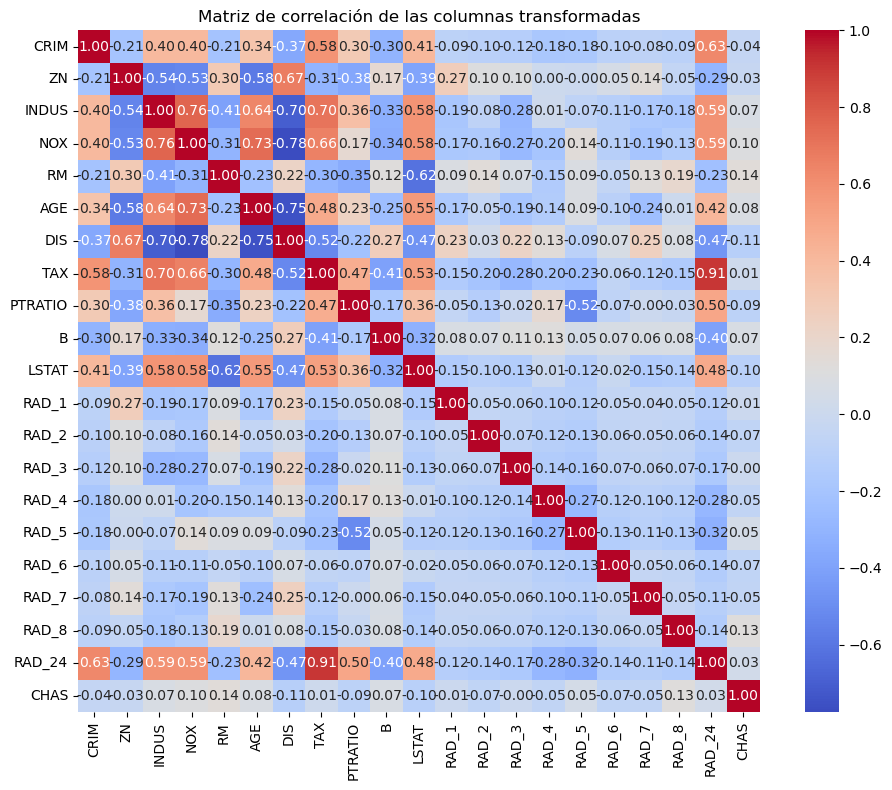

In [35]:
#Gráfico de la Matriz de correlación

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

#crear una matriz de correlación
corr_matrix = X_train_prepared.corr()

# Crear un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

plt.title("Matriz de correlación de las columnas transformadas")
plt.tight_layout()  
plt.show()


Estos son los puntos claves que podemos inferir de este gráfico:

- Coeficientes de Correlación Altos: Los cuadros en rojo oscuro representan pares de variables con alta correlación positiva, mientras que los cuadros en azul oscuro representarían una alta correlación negativa. Los valores de 1 son correlaciones perfectas y se muestran en la diagonal principal, donde cada variable se correlaciona consigo misma

- Variables con Multicolinealidad Potencial: Se observan varios cuadros en rojo fuera de la diagonal principal, indicando la presencia de multicolinealidad. Por ejemplo, las variables RAD (índices de accesibilidad a carreteras radiales) parecen tener correlaciones perfectas o muy altas entre sí, lo que sugiere que pueden estar proporcionando información redundante.

- Variables No Correlacionadas: Los cuadros en blanco o de colores más claros indican una correlación baja o nula entre esas variables. Estas variables son menos propensas a la multicolinealidad y no deberían presentar problemas en este sentido.

